## <u><font color='Blue'> Identifying the Sentiment </font></u>

* Sentiment analysis is contextual mining of text which identifies and extracts subjective information in source material, and helping a business to understand the social sentiment of their brand, product or service while monitoring online conversations. Brands can use this data to measure the success of their products in an objective manner. In this challenge, you are provided with tweet data to predict sentiment on electronic products of netizens.



In [1]:
import numpy as np 
import pandas as pd 
import nltk
import string
from nltk.corpus import stopwords

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

## <u><strong> Importing Data </strong></u>

In [2]:
data=pd.read_csv('train.csv',index_col='id')

In [3]:
## Making Copy of the data 

df=data.copy()

## <u><strong> Text Preprocessing </strong></u>

In [4]:
import re
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

In [5]:
df.head()

,label,tweet
id,,
1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
2,0,Finally a transparant silicon case ^^ Thanks t...
3,0,We love this! Would you go? #talk #makememorie...
4,0,I'm wired I know I'm George I was made that wa...
5,1,What amazing service! Apple won't even talk to...


In [6]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [7]:
def preprocess(x):
  
  ## Lower casing 
  x=x.lower()

  ## Removing urls
  pattern=re.compile(r'https?://[\w./]+')
  x=pattern.sub(f'',x)

  ## Removing Punctutations
  for i in string.punctuation:
    x=x.replace(i,'')
  
  ## Tokenization
  x=word_tokenize(x)

  ## Removing Stopwords
  l=[]
  for i in x:
    if i not in stopwords.words('english'):
      l.append(i)
  
  return l

  



In [8]:
df['Preprocessed_tweet']=df['tweet'].apply(preprocess)

In [9]:
## Root Word tranformation 

from nltk.stem import PorterStemmer

stemmer=PorterStemmer()

def root_words(x):
  l=[]
  for i in x:
    l.append(stemmer.stem(i))
  return l


In [10]:
df['Preprocessed_tweet']=df['Preprocessed_tweet'].apply(root_words)

In [11]:
df.head()

,label,tweet,Preprocessed_tweet
id,,,
1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...,"[fingerprint, pregnanc, test, android, app, be..."
2,0,Finally a transparant silicon case ^^ Thanks t...,"[final, transpar, silicon, case, thank, uncl, ..."
3,0,We love this! Would you go? #talk #makememorie...,"[love, would, go, talk, makememori, unplug, re..."
4,0,I'm wired I know I'm George I was made that wa...,"[im, wire, know, im, georg, made, way, iphon, ..."
5,1,What amazing service! Apple won't even talk to...,"[amaz, servic, appl, wont, even, talk, questio..."


## <u><strong> Data Anlaysis </strong></u>

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7920 entries, 1 to 7920
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   label               7920 non-null   int64 
 1   tweet               7920 non-null   object
 2   Preprocessed_tweet  7920 non-null   object
dtypes: int64(1), object(2)
memory usage: 247.5+ KB


In [13]:
print(f'Number of records in Data : {df.shape[0]}')

Number of records in Data : 7920


In [14]:
print(f'____________Percentage Distribution of Positve and Negative Tweets____________')
ax=df['label'].value_counts(normalize=True)
print(round(ax*100,2))
print(' ')

____________Percentage Distribution of Positve and Negative Tweets____________
0    74.42
1    25.58
Name: label, dtype: float64
 


## <u><strong> Data Vizualization </strong></u>

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns 
from wordcloud import WordCloud 

%matplotlib inline 

sns.set_style('darkgrid')

## <u> Total Review </u>

In [16]:
tweet_pool=""

for i in df['Preprocessed_tweet']:
  for j in i:
    tweet_pool+=j+" "

In [17]:
wordcloud=WordCloud(width=1000,height=800,background_color='white').generate(tweet_pool)

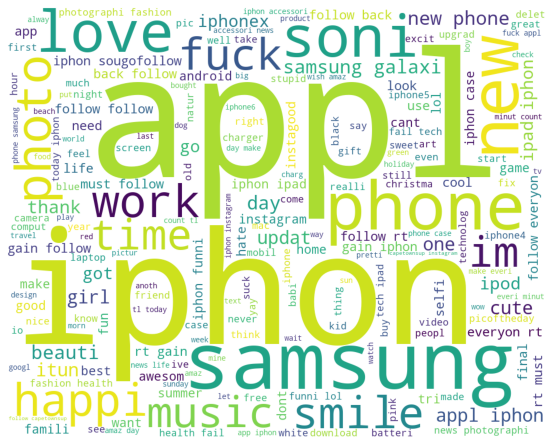

In [18]:
plt.figure(figsize = (10, 6), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [19]:
tweet_list=[]

for i in df['Preprocessed_tweet']:
  for j in i :
    tweet_list.append(j)



fd=FreqDist(tweet_list)

fd.most_common(20)

[('iphon', 3727),
 ('appl', 2877),
 ('samsung', 1388),
 ('new', 1137),
 ('phone', 1015),
 ('follow', 885),
 ('soni', 819),
 ('…', 706),
 ('rt', 525),
 ('ipad', 524),
 ('love', 490),
 ('like', 452),
 ('app', 416),
 ('day', 415),
 ('life', 415),
 ('android', 413),
 ('photo', 394),
 ('get', 382),
 ('instagram', 357),
 ('case', 347)]

## <u> Positive Sentiment </u>

In [20]:
positive_tweet=""

for i in df[df['label']==0]['Preprocessed_tweet']:
  for j in i:
    positive_tweet+=j+" "


In [21]:
wordcloud=WordCloud(width=1000,height=800,background_color='white').generate(positive_tweet)

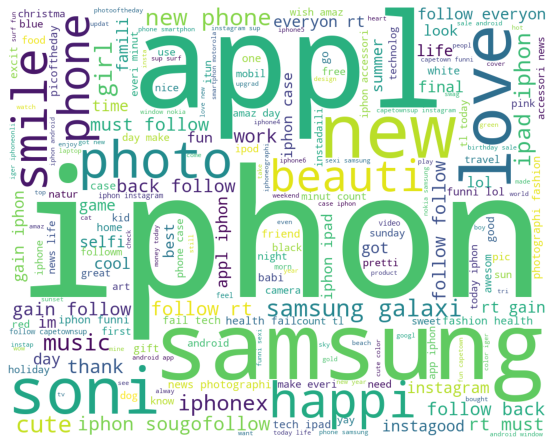

In [22]:
plt.figure(figsize = (10, 6), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [23]:
positive_list=[]

for i in df[df['label']==0]['Preprocessed_tweet']:
  for j in i:
    positive_list.append(j)

fd=FreqDist(positive_list)

fd.most_common(20)

[('iphon', 3128),
 ('appl', 1571),
 ('samsung', 1276),
 ('new', 954),
 ('follow', 881),
 ('soni', 737),
 ('…', 658),
 ('phone', 604),
 ('rt', 494),
 ('love', 447),
 ('ipad', 415),
 ('life', 385),
 ('photo', 364),
 ('android', 361),
 ('instagram', 350),
 ('like', 345),
 ('case', 340),
 ('day', 340),
 ('app', 323),
 ('beauti', 322)]

## <u> Negative Sentiment </u>

In [24]:
negative_tweet=""

for i in df[df['label']==1]['Preprocessed_tweet']:
  for j in i:
    negative_tweet+=j+" "

In [25]:
wordcloud=WordCloud(width=1000,height=800,background_color='white').generate(negative_tweet)

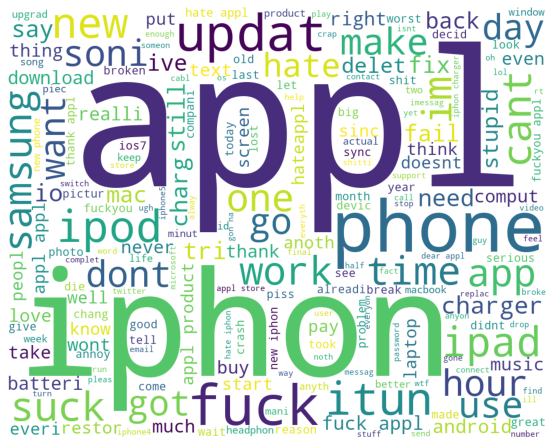

In [26]:
plt.figure(figsize = (10, 6), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [27]:
negative_list=[]

for i in df[df['label']==1]['Preprocessed_tweet']:
  for j in i:
    negative_list.append(j)

fd=FreqDist(negative_list)

fd.most_common(20)

[('appl', 1306),
 ('iphon', 599),
 ('phone', 411),
 ('fuck', 255),
 ('get', 204),
 ('updat', 186),
 ('new', 183),
 ('work', 136),
 ('itun', 135),
 ('cant', 131),
 ('ipod', 130),
 ('hate', 128),
 ('im', 125),
 ('samsung', 112),
 ('time', 111),
 ('ipad', 109),
 ('dont', 108),
 ('like', 107),
 ('go', 105),
 ('one', 103)]

## <u><strong> Spliting the data </strong></u>

In [28]:
X=df['Preprocessed_tweet']

y=df['label']

In [29]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [30]:
train_messages=[]

for i in X_train:
    train_messages.append(' '.join(i))

In [31]:
test_messages=[]

for i in X_test:
    test_messages.append(' '.join(i))

## <u><strong> Machine Learning Model </strong></u>

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

In [33]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score

In [34]:
from sklearn.model_selection import GridSearchCV

In [35]:
def evaluate(y_pred):
  print(classification_report(y_test,y_pred))

  print(confusion_matrix(y_test,y_pred))

  print(precision_score(y_test,y_pred)*100)

## <u> Bag of Words </u>

In [36]:
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.pipeline import Pipeline

In [51]:
pipe_bow=Pipeline([
                      ('bow',CountVectorizer()),
                      ('mnnb',MultinomialNB())
])


mnnb_grid={
    'bow__max_features':[1000,2000,3000],
    'bow__ngram_range':[(1,1),(1,2),(1,3)],
    'mnnb__alpha' : [0.1, 0.5,1]
}

In [52]:
mnnb_gcv=GridSearchCV(pipe_bow,mnnb_grid,cv=5,n_jobs=-1,verbose=1)

In [53]:
mnnb_gcv.fit(train_messages,y_train.values)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('bow', CountVectorizer()),
                                       ('mnnb', MultinomialNB())]),
             n_jobs=-1,
             param_grid={'bow__max_features': [1000, 2000, 3000],
                         'bow__ngram_range': [(1, 1), (1, 2), (1, 3)],
                         'mnnb__alpha': [0.1, 0.5, 1]},
             verbose=1)

In [54]:
mnnb_gcv.best_params_

{'bow__max_features': 3000, 'bow__ngram_range': (1, 1), 'mnnb__alpha': 1}

In [55]:
pipe_bow=Pipeline([
                      ('bow',CountVectorizer(max_features=3000,ngram_range=(1,1))),
                      ('mnnb',MultinomialNB(alpha=1))
])

In [56]:
pipe_bow.fit(train_messages,y_train.values)

Pipeline(steps=[('bow', CountVectorizer(max_features=3000)),
                ('mnnb', MultinomialNB(alpha=1))])

In [57]:
y_pred_bow=pipe_bow.predict(test_messages)

In [58]:
evaluate(y_pred_bow)

              precision    recall  f1-score   support

           0       0.96      0.90      0.93      1152
           1       0.77      0.90      0.83       432

    accuracy                           0.90      1584
   macro avg       0.86      0.90      0.88      1584
weighted avg       0.91      0.90      0.90      1584

[[1035  117]
 [  43  389]]
76.87747035573122


## <u> Tfidf Vectorizer </u>

In [59]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [60]:
pipe_tf=Pipeline([
                  ('tf',TfidfVectorizer()),
                  ('mnnb',MultinomialNB())
])

In [61]:
param_grid={
    'tf__max_features' : [1000, 2000, 3000],
    'tf__stop_words' : ['english', None],
    'tf__ngram_range' : [(1,1),(1,2),(1,3),(2,2)],
    'tf__use_idf' : [True, False],
    'mnnb__alpha' : [0.1, 0.5, 1]
}

In [62]:
tf_gcv=GridSearchCV(pipe_tf,param_grid,cv=5,n_jobs=-1,verbose=1)

In [63]:
tf_gcv.fit(train_messages,y_train.values)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tf', TfidfVectorizer()),
                                       ('mnnb', MultinomialNB())]),
             n_jobs=-1,
             param_grid={'mnnb__alpha': [0.1, 0.5, 1],
                         'tf__max_features': [1000, 2000, 3000],
                         'tf__ngram_range': [(1, 1), (1, 2), (1, 3), (2, 2)],
                         'tf__stop_words': ['english', None],
                         'tf__use_idf': [True, False]},
             verbose=1)

In [64]:
tf_gcv.best_params_

{'mnnb__alpha': 0.5,
 'tf__max_features': 2000,
 'tf__ngram_range': (1, 1),
 'tf__stop_words': None,
 'tf__use_idf': True}

In [65]:
pipe_tf=Pipeline([
                  ('tf',TfidfVectorizer(max_features=2000,ngram_range=(1,1),stop_words=None)),
                  ('mnnb',MultinomialNB(alpha=0.5))
])

In [66]:
pipe_tf.fit(train_messages,y_train.values)

Pipeline(steps=[('tf', TfidfVectorizer(max_features=2000)),
                ('mnnb', MultinomialNB(alpha=0.5))])

In [67]:
y_pred_tf=pipe_tf.predict(test_messages)

In [68]:
evaluate(y_pred_tf)

              precision    recall  f1-score   support

           0       0.92      0.93      0.92      1152
           1       0.80      0.78      0.79       432

    accuracy                           0.89      1584
   macro avg       0.86      0.86      0.86      1584
weighted avg       0.89      0.89      0.89      1584

[[1068   84]
 [  93  339]]
80.1418439716312


### We achieved Accuracy of **89 %** by using Tf-idf Vectorizer 

In [87]:
import pickle

pickle.dump(pipe_tf,open('SentimentIdentifier.pkl','wb'))


### Testing Data


In [71]:
test=pd.read_csv('test.csv')

In [72]:
## making Copy of the data 

df1=test.copy()

In [73]:
df1.head()

,id,tweet
0,7921,I hate the new #iphone upgrade. Won't let me d...
1,7922,currently shitting my fucking pants. #apple #i...
2,7923,"I'd like to puts some CD-ROMS on my iPad, is t..."
3,7924,My ipod is officially dead. I lost all my pict...
4,7925,Been fighting iTunes all night! I only want th...


In [75]:
## Preprocessing 

df1['tweet']=df1['tweet'].apply(preprocess)

In [76]:
df1['tweet']=df1['tweet'].apply(root_words)

In [77]:
out_messages=[]

for i in df1['tweet']:
    out_messages.append(' '.join(i))

In [78]:
y_pred_out=pipe_tf.predict(out_messages)

In [79]:
submit_df=pd.DataFrame(data=df1['id'].values,columns=['id'])

In [81]:
submit_df['label']=y_pred_out

In [82]:
submit_df.head()

,id,label
0,7921,1
1,7922,1
2,7923,1
3,7924,1
4,7925,1


In [83]:
from google.colab import files

submit_df.to_csv('submit_df.csv')
files.download('submit_df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>